# Ford- GoBike

#### Andreina Tirado 2019

# Introduction

Bike sharing is one of the new transportation methods that provides benefits not only for the user but also for the environment. In the following case study we will dive deeper into Ford Go Bike, to get a better understanding of usage patterns with the aim to provide insights on potential areas of improvements

In [33]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [34]:
bike_df = pd.read_csv('full_bikes.csv')

# Data Exploration

In [35]:
#change data types

bike_df['end_station_id'] = bike_df['end_station_id'].fillna(0).astype(int)
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['user_type'] = bike_df['user_type'].astype('category')

#test
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015214 entries, 0 to 3015213
Data columns (total 15 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int32
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          float64
member_gender              object
dtypes: category(1), datetime64[ns](2), float64(6), int32(1), int64(2), object(3)
memory usage: 313.4+ MB


Given that we are interested in exploring the usage patterns, it will be very helpful to extract the start_time information in different columns

In [36]:
#code
bike_df['start_time_year'] = pd.DatetimeIndex(bike_df['start_time']).year
bike_df['start_time_month'] = pd.DatetimeIndex(bike_df['start_time']).month
bike_df['start_time_day'] = pd.DatetimeIndex(bike_df['start_time']).day_name()
bike_df['start_time_hour'] = pd.DatetimeIndex(bike_df['start_time']).hour

Users from **1886** this cannot be correct, so let's set 95 years as our "max" usage age and drop all the rows whose birth year is before 1924.

In [37]:
bike_df['age'] = np.where(bike_df['member_birth_year'] > 1924, 2019 - bike_df['member_birth_year'], np.NaN)

#### Bike sharing general statistics

this will be useful later on, for comparison vs the visualizations

In [38]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_time_year,start_time_month,start_time_hour,age
count,3.015214e+06,3.002777e+06,3.015214e+06,3.015214e+06,3.015214e+06,3.015214e+06,3.015214e+06,3.015214e+06,2.808247e+06,3.015214e+06,3.015214e+06,3.015214e+06,2.806120e+06
mean,8.800043e+02,1.192539e+02,3.776874e+01,-1.223531e+02,1.169892e+02,3.776888e+01,-1.223526e+02,2.654638e+03,1.982997e+03,2.018037e+03,6.400240e+00,1.352129e+01,3.594428e+01
std,2.502496e+03,1.017029e+02,1.007025e-01,1.469537e-01,1.016576e+02,1.005976e-01,1.465561e-01,1.660454e+03,1.046344e+01,6.168568e-01,3.540993e+00,4.719943e+00,1.024227e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,0.000000e+00,3.726331e+01,-1.224737e+02,1.000000e+01,1.878000e+03,2.017000e+03,1.000000e+00,0.000000e+00,1.800000e+01
25%,3.520000e+02,3.000000e+01,3.777106e+01,-1.224117e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.312000e+03,1.978000e+03,2.018000e+03,3.000000e+00,9.000000e+00,2.900000e+01
50%,5.570000e+02,8.700000e+01,3.778107e+01,-1.223983e+02,8.500000e+01,3.778127e+01,-1.223974e+02,2.531000e+03,1.985000e+03,2.018000e+03,7.000000e+00,1.400000e+01,3.400000e+01
75%,8.730000e+02,1.830000e+02,3.779539e+01,-1.222935e+02,1.820000e+02,3.779591e+01,-1.222948e+02,3.701000e+03,1.990000e+03,2.018000e+03,1.000000e+01,1.700000e+01,4.100000e+01
max,8.636900e+04,4.070000e+02,4.551000e+01,-7.357000e+01,4.070000e+02,4.551000e+01,-7.357000e+01,7.082000e+03,2.001000e+03,2.019000e+03,1.200000e+01,2.300000e+01,9.200000e+01


## GoBike - A History that started in 2017

In [39]:
bike_df.shape[0]

3015214

Go Bike started in june 2017, since then the service have registered a total of ***3015214*** trips

## Trip frequency: Which month registers the highest number of trips?

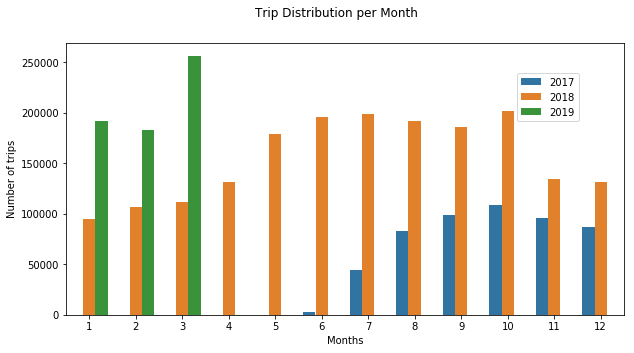

In [40]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Trip Distribution per Month')
sb.countplot(data=bike_df, x='start_time_month', hue= 'start_time_year')
plt.legend(bbox_to_anchor=(0.8,0.8), loc='center left')
plt.ylabel('Number of trips')
plt.xlabel('Months');

Between 2018 and 2019 there is a *growth trend*, at least with regards to number of trips. If we only pay attention to 2018 from May until October there seems to be the most popular months, from November to April there is a decrease, it could be interesting to identify if the temperature, rain or any other weather factor impact this observation. Also it's worth to remark that although winter monts have historically less traffic the numbers for 2019 are above those in 2018.

## Trips duration

How much time does the usual trip last?

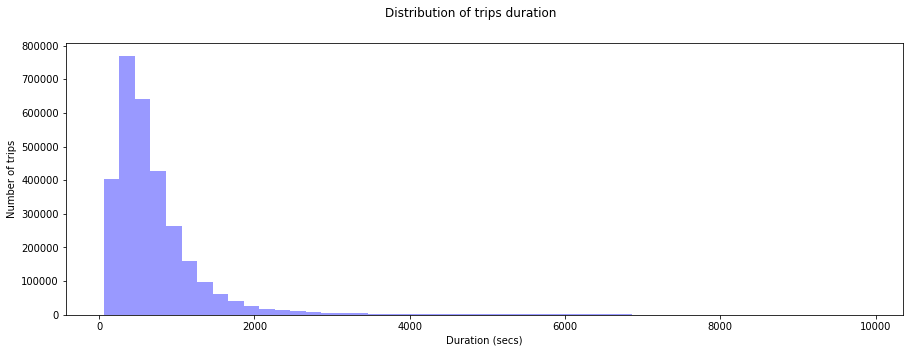

In [41]:
# from the statistics above we get minimum. The max value was set in (after initial run with real max value) 10000
bins = np.arange(61,10000,200)

#plot definition
fig = plt.figure(figsize=(15,5))
fig.suptitle('Distribution of trips duration')
sb.distplot(bike_df['duration_sec'],kde = False , bins = bins, color = "b")
plt.xlabel('Duration (secs)')
plt.ylabel('Number of trips')
plt.show()

From the previous distribution it's clear that most trips lasted 1000 secs on average this means aprox 16 mins. Comparing this result with the one computed before of statistics for the column *duration_sec* this clearly matches. This could mean that most of the users (customers or subscribers) use the service for short duration lengths. 

## Most popular stations (Top 10)

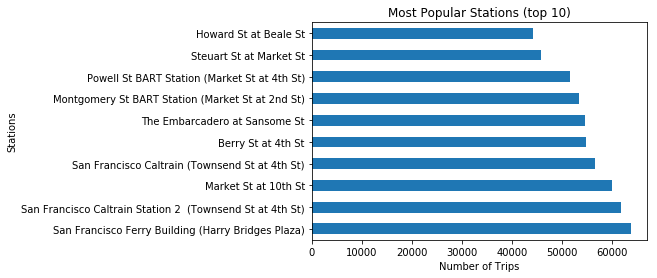

In [42]:
popular_stations = pd.value_counts(bike_df['start_station_name'])
ax = popular_stations.sort_values(ascending = False).head(10).plot.barh()
ax.set_xlabel("Number of Trips")
ax.set_ylabel("Stations")
ax.set_title("Most Popular Stations (top 10)");

In [43]:
pop_station = popular_stations.index.tolist()[0]
pop_station_df = bike_df.query('start_station_name == @pop_station')
pop_station_df['end_station_name'].value_counts().head(1)

The Embarcadero at Sansome St    12223
Name: end_station_name, dtype: int64

In [44]:
bike_df.groupby(['start_station_name', 'end_station_name'])['end_station_name'].count().sort_values(ascending = False).head()

start_station_name                                  end_station_name                                  
San Francisco Ferry Building (Harry Bridges Plaza)  The Embarcadero at Sansome St                         12223
The Embarcadero at Sansome St                       Steuart St at Market St                                7569
Berry St at 4th St                                  San Francisco Ferry Building (Harry Bridges Plaza)     7338
The Embarcadero at Sansome St                       San Francisco Ferry Building (Harry Bridges Plaza)     6191
Grand Ave at Perkins St                             19th Street BART Station                               6059
Name: end_station_name, dtype: int64

The Ferry Building is the most used station (to start trips) with over 60000 accumulated trips. It is worth to mention that the most popular combination of start and end belongs to: ***San Francisco Ferry Building*** and ***The Embarcadero at Sansome St***  with **12223** in total 

## Who uses the service the most?

### Age

In [45]:
bin_edges = np.arange(15,96,10) 
bin_names = [ '15-25','25-35' ,'35-45', '45-55', '55-65','65-75', '75-85', '85-95' ]
bike_df['age_groups'] = pd.cut(bike_df['age'], bin_edges, labels = bin_names)

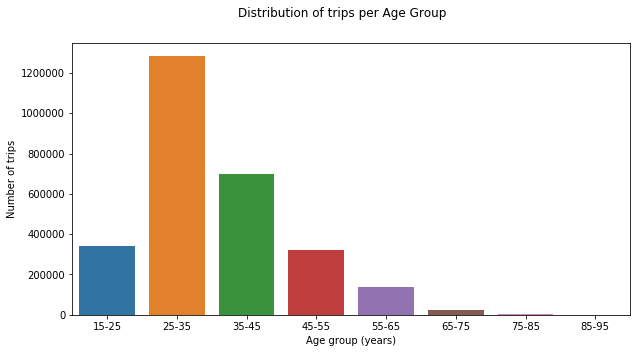

In [46]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Distribution of trips per Age Group')
sb.countplot(data=bike_df, x='age_groups')
plt.ylabel('Number of trips')
plt.xlabel('Age group (years)');

If we look at the trips since the service is live (mid - 2017) we can see that the Go Bike service is most popular among the ones between 25-35 and 35-45 years old. This could probably make sense if one of the use cases for using the service is commuting to work, but we'll need more data to actually review this hypothesis

### Subscribers or customers? 

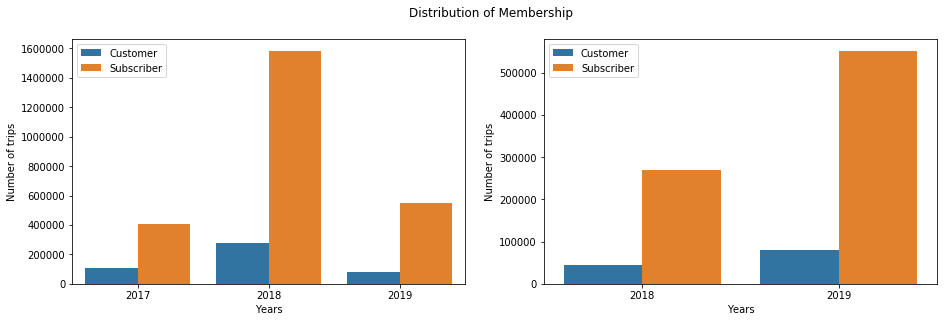

In [81]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15.5, 4.5)

fig.suptitle('Distribution of Membership')

sb.countplot(ax=axs[0],data=bike_df, x='start_time_year', hue= 'user_type')
sb.countplot(ax=axs[1],data=bike_df.query('start_time_month < 4'), x='start_time_year', hue= 'user_type')

[ax.set_xlabel('Years') for ax in plt.gcf().axes]
[ax.set_ylabel('Number of trips') for ax in plt.gcf().axes]
[ax.legend( loc='upper left') for ax in plt.gcf().axes];


The majority of GoBike users since 2017 are subscribers, total subscribers have been growing with a peak in 2018 (chart on the left).  And if the Q1-2019 pace remains, most likely the subscribers during 2019 will continue to grow and exceed previous years.

### Gender females, males, others? 

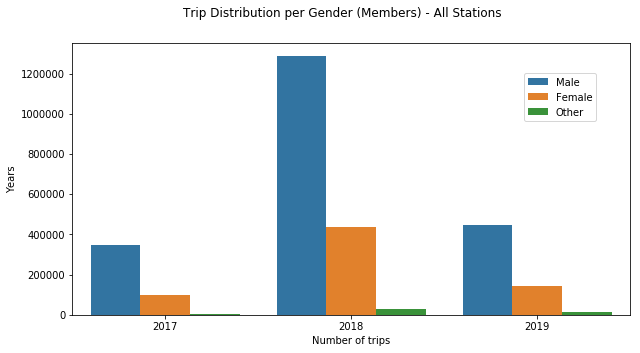

In [48]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Trip Distribution per Gender (Members) - All Stations')
sb.countplot(data=bike_df, x='start_time_year', hue= 'member_gender')
plt.legend(bbox_to_anchor=(0.8,0.8), loc='center left')
plt.xlabel('Number of trips')
plt.ylabel('Years');

There is a clear majority of user identified as males using the service and such trend it has been maintained over the years. Only for 2018 there were more than 1000000 trips for males vs aprox 450000 trips for female 

### Age and Duration: is there a correlation?

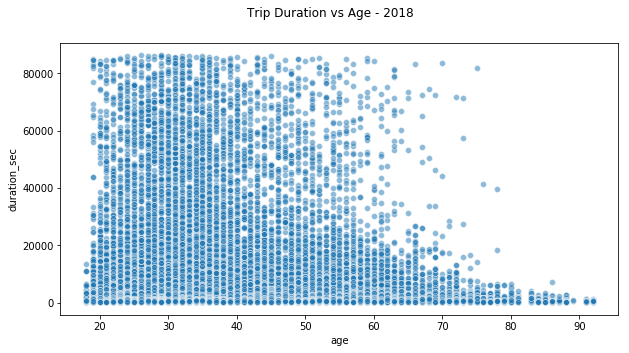

In [49]:

fig = plt.figure(figsize=(10,5))
fig.suptitle('Trip Duration vs Age - 2018')
sb.scatterplot(data=bike_df, y='duration_sec', x= 'age', x_jitter = False, alpha = 0.5);

There seem to be a negative correlation between age and duration. Most of the trips that lasted more than 40k secs were completed by people younger than 50 years, so we could say that the longer the trip (in time) the less age.

## When is the peak usage time for the service?

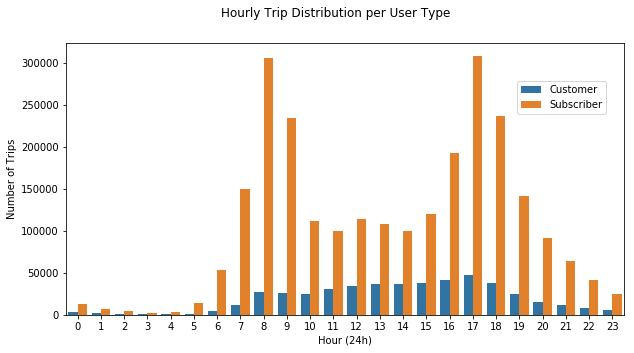

In [50]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Hourly Trip Distribution per User Type')
sb.countplot(data=bike_df, x='start_time_hour', hue= 'user_type')
plt.legend(bbox_to_anchor=(0.8,0.8), loc='center left')
plt.ylabel('Number of Trips')
plt.xlabel('Hour (24h)');

Customer and Subscribers seems to have a slighltly different behaviour, in the case of subscribers this is a bimodal distribution with peaks around 08:00 and 17:00, which could be another hint for the hypothesis using the service to commute to work. The customers on the other hand seem use the service more steadyly from 08:00 to 17:00 hours although there is definetlively a peak around 17:00 and a marked decrease from 19:00 on.

### What about the most popular route?

In [51]:
pop_route = bike_df.query('start_station_name == "San Francisco Ferry Building (Harry Bridges Plaza)" & end_station_name == "The Embarcadero at Sansome St"')

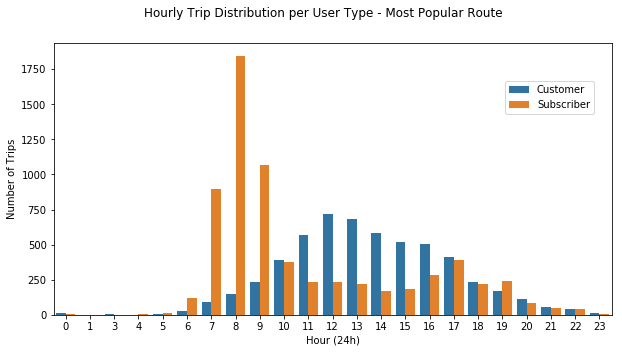

In [52]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Hourly Trip Distribution per User Type - Most Popular Route')
sb.countplot(data=pop_route, x='start_time_hour', hue= 'user_type')
plt.legend(bbox_to_anchor=(0.8,0.8), loc='center left')
plt.ylabel('Number of Trips')
plt.xlabel('Hour (24h)');

In this case, it's very interesting the peak observed between 07:00 and 9:00 for subscribers, and the normal distribution for customers with a peak around lunch times.

# Conclusions

* Total registered trips: 3015214 such number includes data since june 2017, and according to the observations there have been a steady growth of trips per year. Only comparing january 2018 vs 2019 there have been an increase of approx 50% trend that repeats for at least the first three months of 2019.
* Males (both subscribed and customers) between 30 to 50 years old, seem to be the ones using the most this service.
* The most popular route is the one between the Ferry Building station and Embarcaderos with a significant peak of subscribed users in the morning around 08:00 this means bicycle availability during that time slot is important. Ferry Building is also the most popular starting point. 
* The usage pattern during the day among all stations is bimodal with peaks in the morning and afternoon.
* There seem to be a negative correlation among trip duration (time) and user age, according to the observations it seems to be more likely that longer trips are done by younger people.
